<h1>Day Four

<h2>Load and Preprocess the Dataset
python
Copy
Edit


In [3]:
import pandas as pd
df = pd.read_csv("data.csv")
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


<h2>Train/Test Split and Standardize Features

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<h2>Fit a Logistic Regression Model

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

<h2>Evaluate the Model

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC: 0.99737962659679


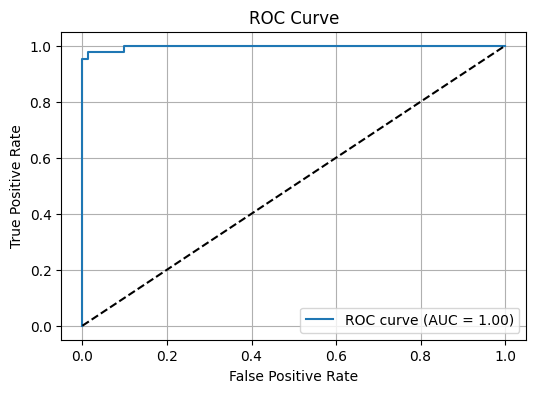

In [6]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_probs = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_probs >= 0.5).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


<h2>Tune the Threshold and Observe the Effect

In [7]:
new_threshold = 0.3
y_pred_new = (y_probs >= new_threshold).astype(int)

print("\nWith threshold = 0.3")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))
print("Precision:", precision_score(y_test, y_pred_new))
print("Recall:", recall_score(y_test, y_pred_new))



With threshold = 0.3
Confusion Matrix:
 [[67  4]
 [ 1 42]]
Precision: 0.9130434782608695
Recall: 0.9767441860465116
